<a href="https://colab.research.google.com/github/Joseluismed/Tarea2_Solitones_JLMG/blob/main/Tarea2_solitones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Vórtices globales

## Para n=0



Código numérico con n=0

Valor f(0) ajustado: 1.0


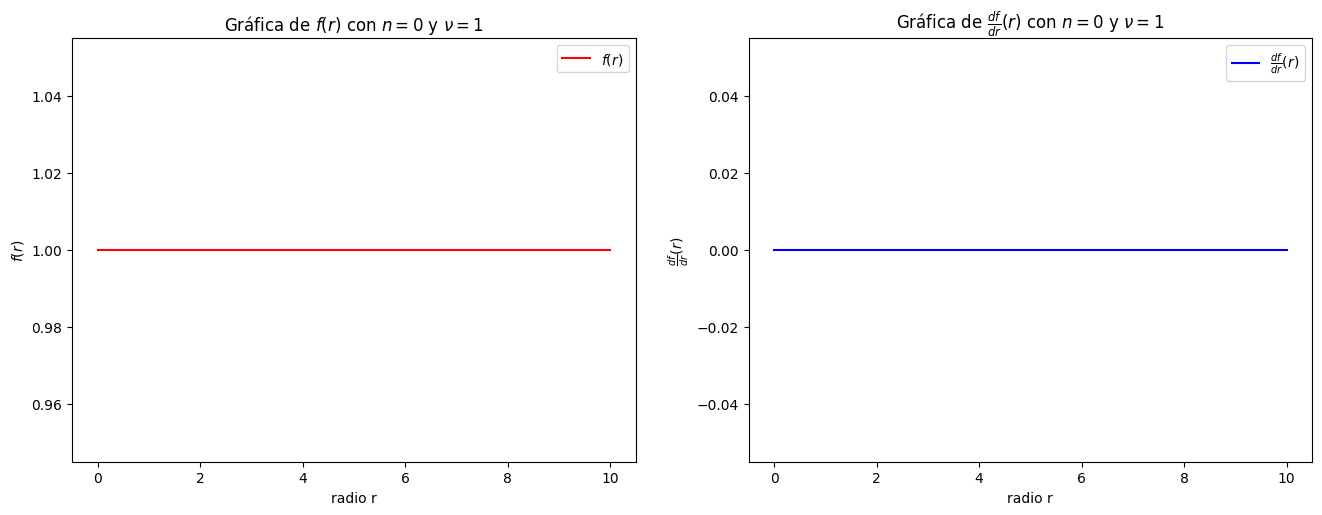

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#SOLUCIÓN CON n=0
# Parámetros de ecuacion diferencial
nu = 1
l=1   #lambda
# Definir la ecuación diferencial a resolver sistema(variable independiente, vector estado[])
def sistema(r, y):
    """
    phi: posición
    y: vector de estado [phi, v]
    """
    f, v = y  # funcion y su derivada
    if r == 0:
        dfdr = 0
        dvdr = 0
    else:
        dfdr = v  # Derivada de f con respecto a r
        dvdr = -v/r + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
    return np.array([dfdr, dvdr])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol



# Intervalo y número de puntos
a = 0  # Inicio del intervalo
b = 10  # Fin del intervalo
npt = 500  # Número de puntos

#método de shooting para encontrar valor inicial de función f(r=0)
def shootingn0(f_amin, f_amax, nu, a, b, tol=1e-14):
    while True:
      h=(f_amin+f_amax)/2
      y0 = [h, 0]
      r, sol = RK4Met(sistema, y0, a, b, npt)
      if abs(sol[-1, 0] - nu) < tol:
        return h
      if sol[-1, 0] < nu:
        f_amin = h
      else:
        f_amax = h
      if abs(f_amax - f_amin) < tol:
        return h



#Intervalo de shooting
f_amin = nu-10
f_amax = nu+10

# Solución final con el valor ajustado de la función en f(r=0)
h = shootingn0(f_amin, f_amax, nu, a, b)
y0 = [h, 0]
print('Valor f(0) ajustado:', h)

r, sol = RK4Met(sistema, y0, a, b, npt)
f = sol[:, 0]
v = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, f, c='red', label=r'$f(r)$')
ax[1].plot(r, v, c='blue', label=r'$\frac{df}{dr}(r)$')
ax[0].set_xlabel('radio r')
ax[1].set_xlabel('radio r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\frac{df}{dr}(r)$')
ax[0].set_title(r'Gráfica de $f(r)$ con $n=0$ y $\nu=1$')
ax[1].set_title(r'Gráfica de $\frac{df}{dr}(r)$ con $n=0$ y $\nu=1$')
ax[0].legend()
ax[1].legend()
plt.show()


Gráfica de densidad de energía con n=0

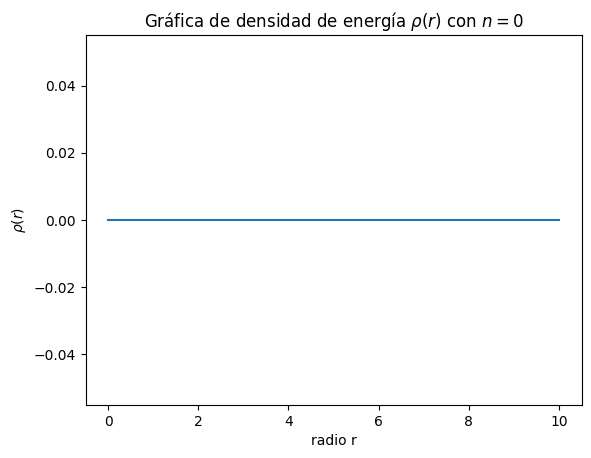

In [8]:
#gráfica de densidad de energía con n=0
rho=v**2+(l/2)*(f**2-nu**2)**2
plt.plot(r,rho)
plt.xlabel('radio r')
plt.ylabel(r'$\rho(r)$')
plt.title(r'Gráfica de densidad de energía $\rho(r)$ con $n=0$')
plt.show()

Cálculo numérico de la energía en base a la densidad de energía con n=0

In [10]:
E=np.trapz(rho,r)
print('La energía con la configuración n=0 es E=',E)

La energía con la configuración n=0 es E= 0.0


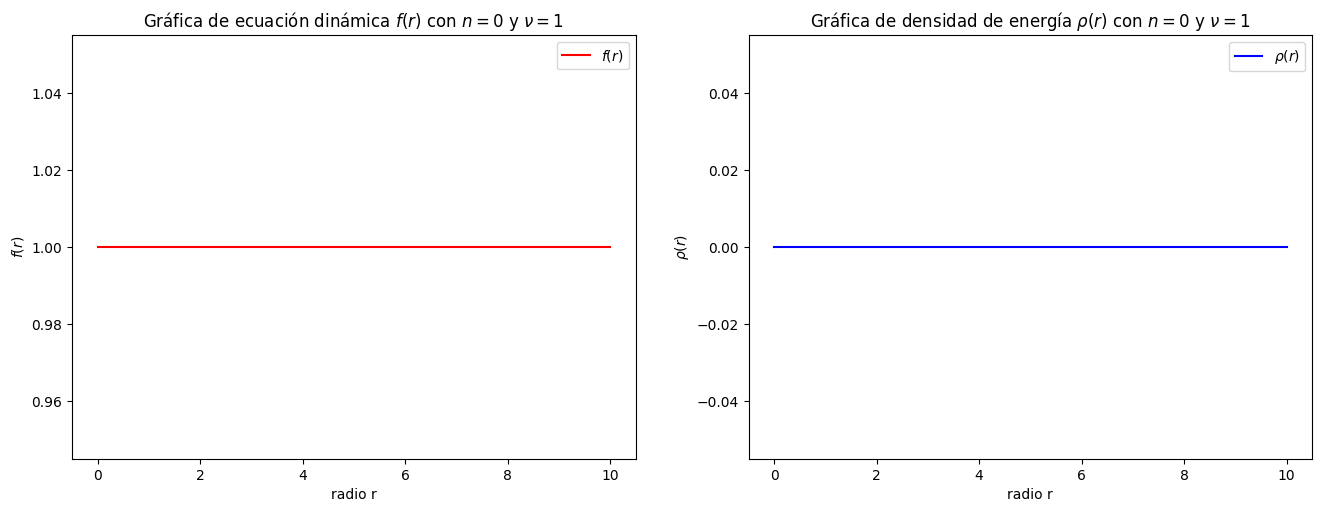

In [13]:
# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, f, c='red', label=r'$f(r)$')
ax[1].plot(r, rho, c='blue', label=r'$\rho(r)$')
ax[0].set_xlabel('radio r')
ax[1].set_xlabel('radio r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\rho(r)$')
ax[0].set_title(r'Gráfica de ecuación dinámica $f(r)$ con $n=0$ y $\nu=1$')
ax[1].set_title(r'Gráfica de densidad de energía $\rho(r)$ con $n=0$ y $\nu=1$')
ax[0].legend()
ax[1].legend()
plt.show()